# Logistic Regression

在这个exercise中，我们要建立一个`Logistic Regression model` 来预测一个学生能否被大学录取。 根据两个测试的结果决定他们是否被录取。 有以前的申请人的数据来训练这个模型。对每个例子都有申请人的两门测试成绩和录取结果。
目标是建立一个分类模型，基于这两次测试成绩来评估申请人被录取的可能性。

## 1.1 Visualizing the data

导入数据

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'ex2data1.txt'
data1 = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

data1.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**创建两个分数的散点图，并使用颜色来可视化**

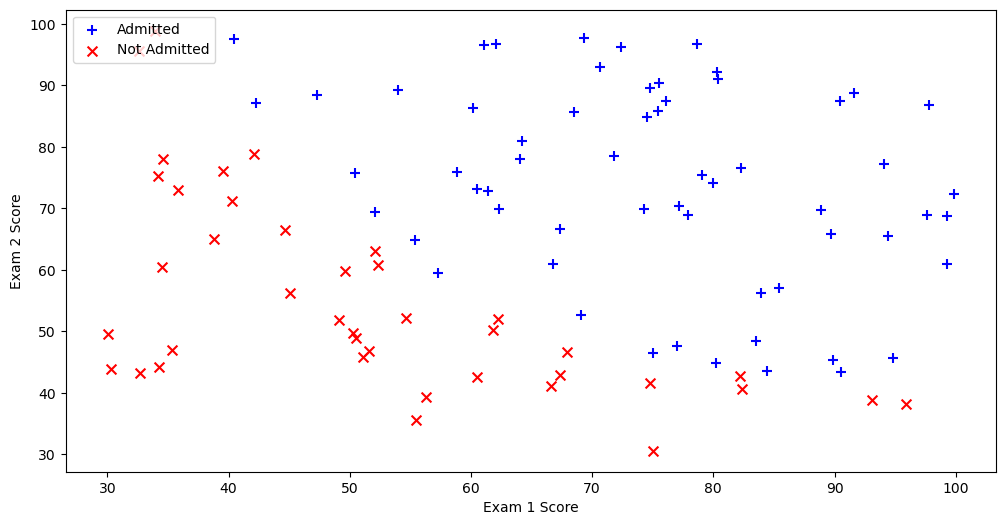

In [55]:
positive = data1[data1['Admitted'] == 1]
negative = data1[data1['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='+', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')

ax.legend(loc='upper left')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

## 1.2 Implementation

### 1.2.1 sigmoid function

logistic regression hypothesis is defined as :
$$
    h_\theta(x) = g(\theta^Tx)
$$
where function $g$ is the sigmoid function. And the sigmoid function is defined as:
$$
    g(z) = \frac{1}{1 + e^{-z}}
$$
结合两者，我们最终得到的logistic regression hypothesis is defined as:
$$
    h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**quick check**

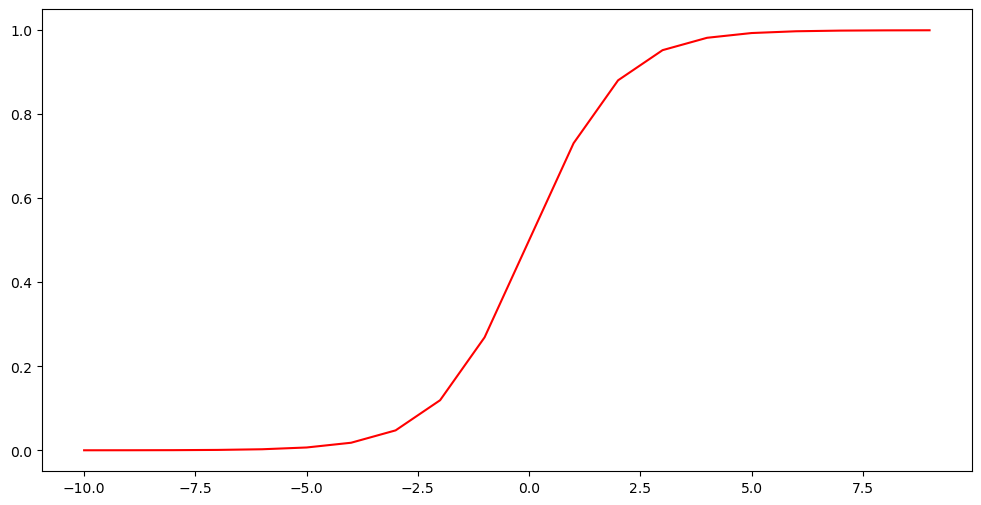

In [57]:
nums = np.arange(-10.0, 10.0, step=1)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

### 1.2.2 Cost function and gradient

cost function in logistic regression is :
$$
    J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}
$$
positive_cost:
$$
    -y^{(i)}log(sigmoid(x^{(i)})
$$
negative_cost:
$$
    -(1-y^{(i)})log(1-sigmoid(x^{(i)})
$$


In [58]:
def cost(theta, X, y):
    z = X @ theta # shape(m_sample, )
    h = sigmoid(z)

    # 分情况计算损失
    cost_positive = -y * np.log(h)

    cost_negative = -(1 - y) * np.log(1 - h)

    return np.mean(cost_positive + cost_negative)

做与Ex1同样的操作

In [59]:
# add an ones column - this makes the matrix multiplication work out easier
data1.insert(0, 'Ones', 1)

In [60]:
# set X and y
X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

theta = np.zeros(X.shape[1])

In [61]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100,))

In [62]:
cost(theta, X, y)

np.float64(0.6931471805599453)

#### **gradient**
- batch gradient descent
- 转化为向量化计算：$\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [63]:
def gradient(theta, X, y):

    # # 方法一
    # parameters = theta.size
    # grad = np.zeros(parameters)
    #
    # error = sigmoid(X @ theta) - y
    #
    # for i in range(parameters):
    #     term = np.multiply(error ,X[:, i])
    #
    #     grad[i] = np.sum(term) / len(X)

    # return grad


    # 方法二

    return X.T @ (sigmoid(X @ theta) - y) / len(X)

注意，我们实际上没有在这个函数中执行梯度下降，我们仅仅在计算一个梯度步长。在练习中，一个称为“fminunc”的Octave函数是用来优化函数来计算成本和梯度参数。由于我们使用Python，我们可以用SciPy的“optimize”命名空间来做同样的事情。

看看使用数据和初始参数为0的梯度下降的结果

In [64]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

现在可以用SciPy's truncated newton（TNC）实现寻找最优参数。

In [65]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

result

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631317E-01   7.89087138E-01
    2    5  5.892425231252117E-01   7.39226502E+01
    3    7  4.227824104563589E-01   1.85265870E+01
    4    9  4.072926943219493E-01   1.68671139E+01
    5   11  3.818854898559373E-01   1.07735076E+01
    6   13  3.786234845077009E-01   2.31584941E+01
tnc: stepmx = 1000
    7   16  2.389268078789831E-01   3.00821750E+00
    8   18  2.047203881185489E-01   1.52227131E-01
    9   20  2.046713892269646E-01   6.62494289E-02
   10   22  2.035303165151698E-01   9.30779324E-04
tnc: fscale = 32.7776
   11   24  2.035293524072849E-01   8.07247015E-06
   12   26  2.035251116769247E-01   1.80208017E-04
   13   28  2.034984106962321E-01   5.02837758E-04
   14   30  2.034978380431661E-01   9.90616457E-06
   15   32  2.034977906580335E-01   3.77560929E-06
   16   34  2.034977387347841E-01   1.94430862E-05
   17   36  2.034977015894747E-01   2.45265459E-13


(array([-25.16131858,   0.20623159,   0.20147149]), 36, 0)

在这个结论下代价函数计算结果样子

In [66]:
cost(result[0], X, y)

np.float64(0.20349770158947472)

### 1.2.3 Evluating logistic regression

根据我们所学的参数theta来为数据集X输出预测。然后，使用这个函数来给分类器的训练精度打分

当$h_\theta \ge 0.5$ 时，predict $y = 1$

当$h_\theta \le 0.5$ 时，predict $y = 0$

In [67]:
def predict(theta, X):
    probability = sigmoid(X @ theta)
    # return [1 if x >= 0.5 else 0 for x in probability]
    return (probability >= 0.5).astype(int)

In [68]:
theta_min = result[0]
print(theta_min.shape, X.shape)
predictions = predict(theta_min, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0
           for a, b in zip(predictions, y)]

accuracy = (sum(correct) / len(predictions)) * 100
print ('accuracy = {0}%'.format(accuracy))

(3,) (100, 3)
accuracy = 89.0%


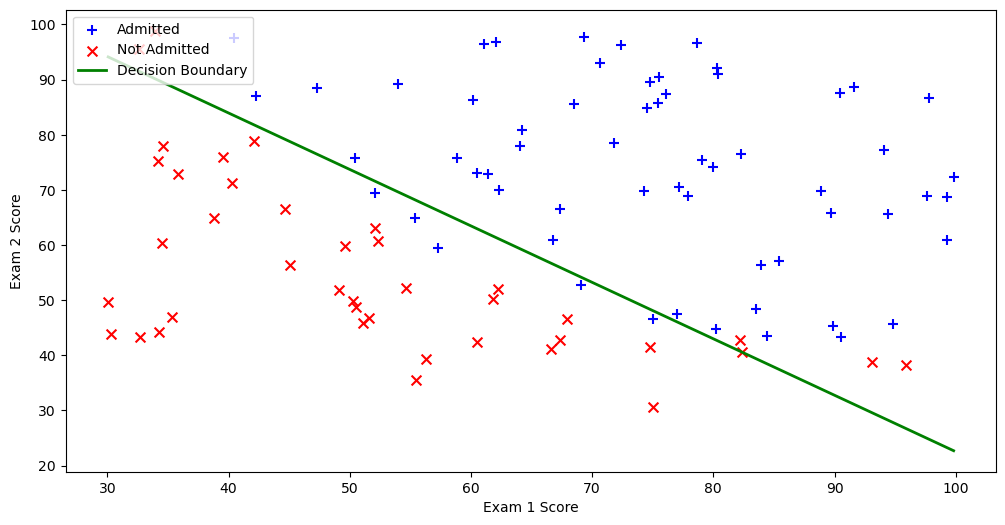

In [69]:
positive = data1[data1['Admitted'] == 1]
negative = data1[data1['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='+', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')

x1_values = np.linspace(data1['Exam 1'].min(), data1['Exam 1'].max(), 100)
x2_values = (-result[0][0] - result[0][1] * x1_values) / result[0][2]
ax.plot(x1_values, x2_values, lw=2, c='green', label='Decision Boundary')

ax.legend(loc='upper left')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

我们的逻辑回归分类器预测正确，如果一个学生被录取或没有录取，达到89%的精确度。不坏！记住，这是训练集的准确性。我们没有保持住了设置或使用交叉验证得到的真实逼近，所以这个数字有可能高于其真实值（这个话题将在以后说明）。